## Importing required libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Importing the dataset

In [23]:
df = pd.read_csv('./Diabetes_raw_dataset.csv')
df.head()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,1,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,2,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,3,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,4,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,5,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


## Data exploration and cleaning

Checking for any null values in the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient number        500 non-null    int64  
 1    Cholesterol (mg/dl)  499 non-null    float64
 2   Glucose (mg/dl)       499 non-null    float64
 3   HDL Chol (mg/dl)      499 non-null    float64
 4   TChol/HDL ratio       499 non-null    float64
 5   Age                   500 non-null    int64  
 6   Gender                495 non-null    object 
 7   Height /stature (cm)  500 non-null    float64
 8   weight1 (Kg)          500 non-null    float64
 9   weight2(Kg)           500 non-null    int64  
 10  BMI (Kg/m^2)          500 non-null    float64
 11  Systolic BP           498 non-null    float64
 12  Diastolic BP          498 non-null    float64
 13  waist (cm)            500 non-null    float64
 14  hip (cm)              500 non-null    float64
 15  Diabetes              4

Checking how many null values are present for each feature

In [25]:
df.isna().sum()

Patient number          0
 Cholesterol (mg/dl)    1
Glucose (mg/dl)         1
HDL Chol (mg/dl)        1
TChol/HDL ratio         1
Age                     0
Gender                  5
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             2
Diastolic BP            2
waist (cm)              0
hip (cm)                0
Diabetes                7
dtype: int64

Dropping all the rows with null values

In [26]:
df = df.dropna()

In [27]:
df.isna().sum()

Patient number          0
 Cholesterol (mg/dl)    0
Glucose (mg/dl)         0
HDL Chol (mg/dl)        0
TChol/HDL ratio         0
Age                     0
Gender                  0
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             0
Diastolic BP            0
waist (cm)              0
hip (cm)                0
Diabetes                0
dtype: int64

In [28]:
df.head()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,1,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,2,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,3,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,4,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,5,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


Checking the range for values in the dataset

In [29]:
df.describe()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.00000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,242.904564,208.622407,129.300830,50.311203,4.477386,46.626556,167.240664,83.00695,80.163900,29.933983,136.732365,82.865145,95.849378,109.072407
std,141.423456,50.991485,421.237903,17.151721,1.657719,17.458402,12.622313,46.99381,18.580501,18.193906,23.028613,13.565291,15.221900,14.231773
min,1.000000,2.000000,48.000000,1.000000,1.500000,19.000000,0.000000,0.00000,0.000000,0.000000,90.000000,48.000000,0.000000,76.200000
25%,121.250000,179.000000,81.000000,39.000000,3.200000,31.000000,160.000000,68.21250,68.000000,23.092500,120.000000,74.000000,83.800000,99.100000
50%,241.500000,204.000000,89.000000,46.000000,4.200000,43.000000,167.600000,79.00000,78.000000,28.150000,136.000000,82.000000,94.000000,106.700000
75%,361.750000,230.000000,107.750000,59.000000,5.300000,61.000000,175.300000,90.80000,90.000000,33.905000,148.000000,90.000000,104.100000,116.800000
max,499.000000,500.000000,9091.000000,120.000000,19.300000,92.000000,193.000000,996.98000,148.000000,377.280000,250.000000,124.000000,142.200000,162.600000


Checking the type of categories we have for categorical features.

In [30]:
df['Gender'].value_counts()

female    277
male      205
Name: Gender, dtype: int64

In [31]:
df['Diabetes'].value_counts()

No diabetes    410
Diabetes        72
Name: Diabetes, dtype: int64

The number of diabetic patents is very low as compared to the non-diabetic ones.

- I have removed the `Patient number` Column as it is for internal records is not required for diabetes prediction.

Removing the `Patient number` column

In [32]:
df = df.drop(columns=['Patient number'])

In [33]:
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


Plotting the heat map

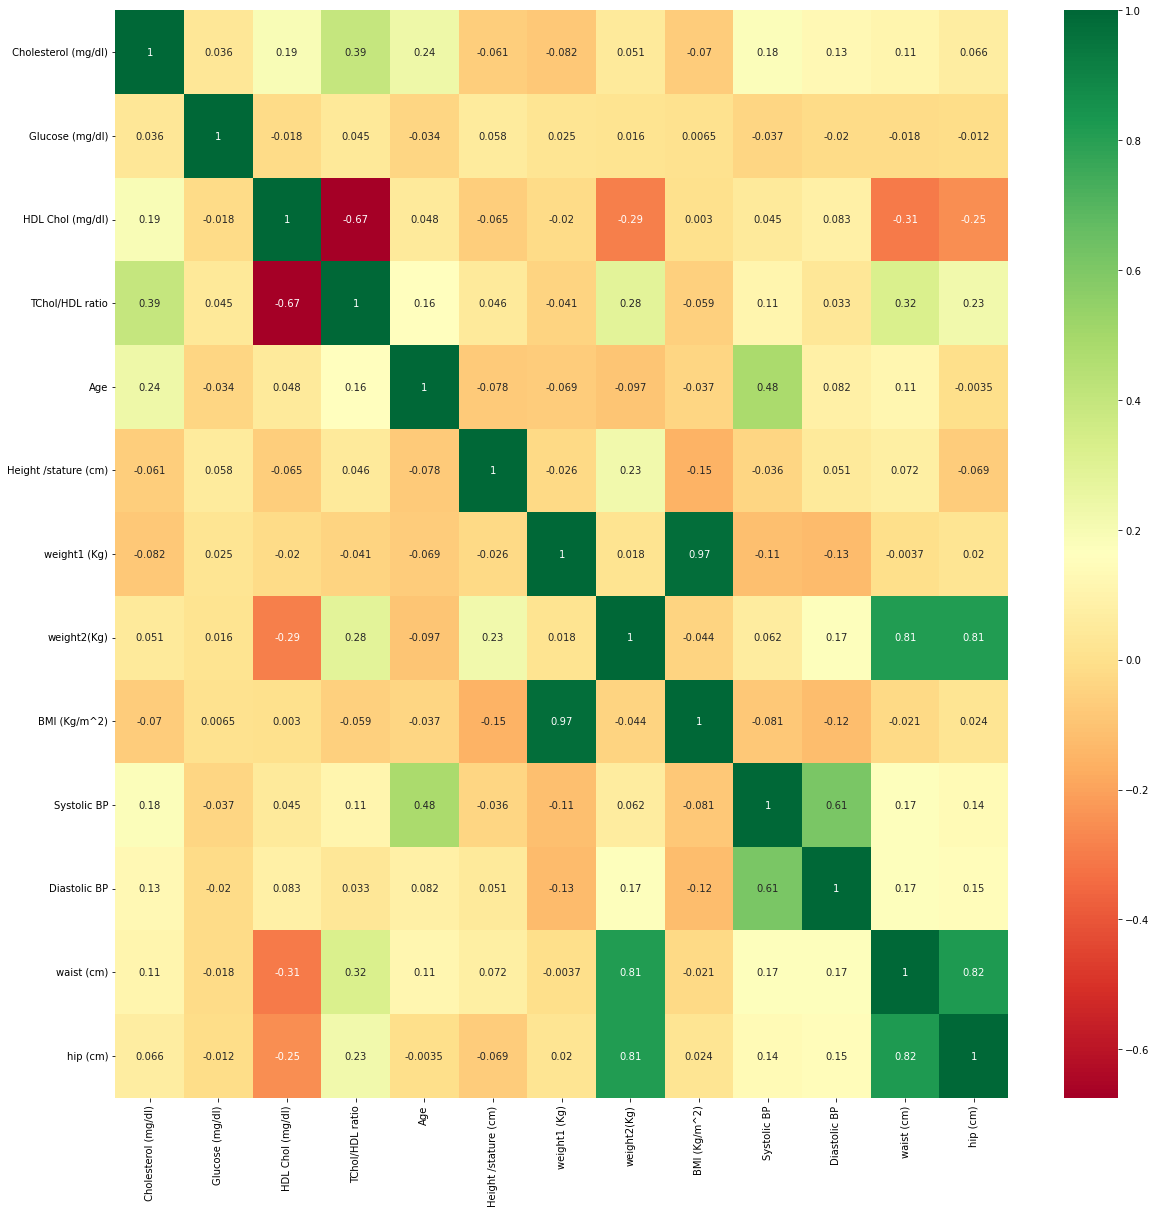

In [34]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- I will also remove the `Height`, `Weight1` and `Weight2` columns as we already have the calculated BMI for each patient.
- Article 2 mentions that `WHR (Waist Hip Ratio)` and `WC (Waist circumferece)` are best indicators for predicting Type 2 diabetes. We have the waist and hip measurements and `WHR` can be calculated by dividing the `waist (cm)` and `hip (cm)` values for the particular patient. We will then drop the `hip (cm)` column as we already have the ratio and the the hip measurement alone is not shown to be contributing for Type 2 diabetes.

- We will tansform the `Gender` column to have `1` for `female` and `0` for `male` values.
- We will tansform the `Diabetes` column to `1` for `male` and `0` for `female ` values.

Calculating the values for `WHR`

In [35]:
whr = df['waist (cm)'] / df['hip (cm)']
whr = whr.round(2)

In [36]:
df['WHR'] = whr

Transforming the Gender column

In [37]:
df = pd.get_dummies(df, columns=['Gender'])

Transforming the Diabetes column

In [38]:
df.loc[df['Diabetes'] == 'No diabetes', 'Diabetes'] = 0
df.loc[df['Diabetes'] == 'Diabetes', 'Diabetes'] = 1

Removing the hip, height and weight columns

In [39]:
df = df.drop(columns=['hip (cm)', 'Height /stature (cm)', 'weight1 (Kg)', 'weight2(Kg)'])

In [40]:
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),Diabetes,WHR,Gender_female,Gender_male
0,193.0,77.0,49.0,3.9,19,22.88,118.0,70.0,81.3,0,0.84,1,0
1,146.0,79.0,41.0,3.6,19,42.61,108.0,58.0,83.8,0,0.82,1,0
2,217.0,75.0,54.0,4.0,20,40.13,110.0,72.0,101.6,0,0.89,1,0
3,226.0,97.0,70.0,3.2,20,20.44,122.0,64.0,78.7,0,0.79,1,0
4,164.0,91.0,67.0,2.4,20,26.28,122.0,86.0,81.3,0,0.82,1,0


Splitting the dataset into features and labels

In [41]:
df.columns

Index([' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age', 'BMI (Kg/m^2)', 'Systolic BP', 'Diastolic BP',
       'waist (cm)', 'Diabetes', 'WHR', 'Gender_female', 'Gender_male'],
      dtype='object')

In [42]:
X = df[[' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age', 'BMI (Kg/m^2)', 'Systolic BP', 'Diastolic BP',
       'waist (cm)', 'WHR', 'Gender_female', 'Gender_male']]
y = df[['Diabetes']].astype('int').values

In [43]:
X.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),WHR,Gender_female,Gender_male
0,193.0,77.0,49.0,3.9,19,22.88,118.0,70.0,81.3,0.84,1,0
1,146.0,79.0,41.0,3.6,19,42.61,108.0,58.0,83.8,0.82,1,0
2,217.0,75.0,54.0,4.0,20,40.13,110.0,72.0,101.6,0.89,1,0
3,226.0,97.0,70.0,3.2,20,20.44,122.0,64.0,78.7,0.79,1,0
4,164.0,91.0,67.0,2.4,20,26.28,122.0,86.0,81.3,0.82,1,0


## Preprocessing the dataset

In [44]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.values)

## Creating train test splits

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
len(X_train), len(y_train), len(X_test), len(y_test)

(385, 385, 97, 97)

## Ensemble model

In [47]:
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('dt', dt),
                                        ('svm', svm),
                                        ('lr', lr)], 
                           voting='hard')

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Ensemble system accuracy:', accuracy)

Ensemble system accuracy: 0.8762886597938144


C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chinmay\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        84
           1       0.57      0.31      0.40        13

    accuracy                           0.88        97
   macro avg       0.74      0.64      0.67        97
weighted avg       0.86      0.88      0.86        97



<Figure size 720x504 with 0 Axes>

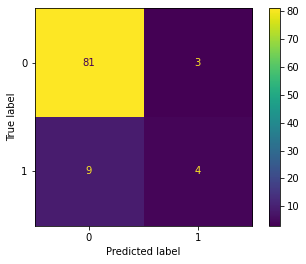

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
ConfusionMatrixDisplay(cm).plot()

## Approach 2:

- I also tried to predict the type 2 diabetes using PCA on the original dataset and found that the `Total Cholestrol` explanied the majority variance in the dataset.
- Transforming the dataset using pca for **99%** explained variance and using the transformed data to predict the type 2 diabetes resulted in a better model for the given dataset.

In [50]:
from sklearn.decomposition import PCA

In [51]:
df = pd.read_csv('./Diabetes_raw_dataset.csv')
df = df.dropna()

In [52]:
df.isna().sum()

Patient number          0
 Cholesterol (mg/dl)    0
Glucose (mg/dl)         0
HDL Chol (mg/dl)        0
TChol/HDL ratio         0
Age                     0
Gender                  0
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             0
Diastolic BP            0
waist (cm)              0
hip (cm)                0
Diabetes                0
dtype: int64

In [53]:
df.columns

Index(['Patient number', ' Cholesterol (mg/dl)', 'Glucose (mg/dl)',
       'HDL Chol (mg/dl)', 'TChol/HDL ratio', 'Age', 'Gender',
       'Height /stature (cm)', 'weight1 (Kg)', 'weight2(Kg)', 'BMI (Kg/m^2)',
       'Systolic BP', 'Diastolic BP', 'waist (cm)', 'hip (cm)', 'Diabetes'],
      dtype='object')

In [54]:
new_df = df[[' Cholesterol (mg/dl)', 'Glucose (mg/dl)',
       'HDL Chol (mg/dl)', 'TChol/HDL ratio', 'Age', 'Gender',
       'Height /stature (cm)', 'weight1 (Kg)', 'weight2(Kg)', 'BMI (Kg/m^2)',
       'Systolic BP', 'Diastolic BP', 'waist (cm)', 'hip (cm)', 'Diabetes']]

In [55]:
new_df.loc[new_df['Diabetes'] == 'No diabetes', 'Diabetes'] = 0
new_df.loc[new_df['Diabetes'] == 'Diabetes', 'Diabetes'] = 1

In [56]:
new_df['Gender'] = [1 if x == 'male' else 0 for x in new_df['Gender']]

C:\Users\Chinmay\AppData\Local\Temp\ipykernel_9864\4034748898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Gender'] = [1 if x == 'male' else 0 for x in new_df['Gender']]


In [57]:
new_df.columns

Index([' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age', 'Gender', 'Height /stature (cm)',
       'weight1 (Kg)', 'weight2(Kg)', 'BMI (Kg/m^2)', 'Systolic BP',
       'Diastolic BP', 'waist (cm)', 'hip (cm)', 'Diabetes'],
      dtype='object')

In [58]:
new_df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,193.0,77.0,49.0,3.9,19,0,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,0
1,146.0,79.0,41.0,3.6,19,0,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,0
2,217.0,75.0,54.0,4.0,20,0,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,0
3,226.0,97.0,70.0,3.2,20,0,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,0
4,164.0,91.0,67.0,2.4,20,0,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,0


In [59]:
X = new_df[[' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age', 'Gender', 'Height /stature (cm)',
       'weight1 (Kg)', 'weight2(Kg)', 'BMI (Kg/m^2)', 'Systolic BP',
       'Diastolic BP', 'waist (cm)', 'hip (cm)']]

In [60]:
y = new_df['Diabetes']

In [61]:
y = y.astype('int')

In [62]:
X.shape

(482, 14)

In [63]:
pca = PCA(0.99) # 99 % explained variance
pca.fit(X)

PCA(n_components=0.99)

In [64]:
pca.explained_variance_ratio_

array([0.96003018, 0.01535145, 0.0127764 , 0.00415459])

In [65]:
transformed_data = pca.transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)

In [67]:
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('dt', dt),
                                        ('svm', svm),
                                        ('lr', lr)], 
                           voting='hard')

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Ensemble system accuracy:', accuracy)

Ensemble system accuracy: 0.9278350515463918


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        84
           1       0.88      0.54      0.67        13

    accuracy                           0.93        97
   macro avg       0.90      0.76      0.81        97
weighted avg       0.92      0.93      0.92        97



<Figure size 720x504 with 0 Axes>

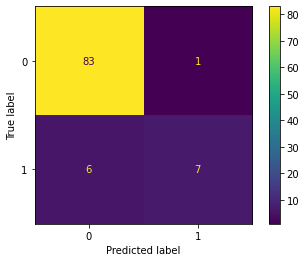

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
ConfusionMatrixDisplay(cm).plot()

## Conclusion

- For the task of predicting type-2 diabetes, I believe that it is important to follow the medical team's recommendations and investigate further attributes beyond just cleaning the dataset and choosing features based on their correlation with the dependent variable.

- Medical experts have a deep understanding of the underlying biology and physiology of the disease, and the factors that are most indicative of the disease. They can provide valuable insights into which attributes are most important to consider, and how to interpret the results of the analysis.

- In addition, it is important to consider the overall performance of the model, not just its performance on a single metric such as accuracy. A model that performs well for both well and at-risk persons is desirable. For example, a high accuracy may be achieved by a model that only predicts well persons as negative, but it would not be a good solution for the client as it would not identify at-risk persons.

- In order to have an optimal solution, it is important to consider other metric like F1-score to evaluate the performance of the model. These metrics can provide a better understanding of how well the model is able to identify at-risk persons.

- In summary, I believe that it is important to follow the medical team's recommendations, investigate further attributes, and evaluate the model's performance using multiple metrics to achieve a good solution for predicting type-2 diabetes.